In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import plotly.plotly as pl

def compile_csv(startYear, endYear):
    df_list = []
    for i in range(startYear, endYear + 1):
        off_filename = str(i) + 'Offense.csv'
        def_filename = str(i) + 'Defense.csv'
        off_df = pd.read_csv(off_filename)
        off_df["Unit"] = ["Offense" if pos != "LS" else "Special" for pos in off_df["Pos"]]
        def_df = pd.read_csv(def_filename)
        def_df["Unit"] = ["Defense" if (pos != "K" and pos != "P") else "Special" for pos in def_df["Pos"]]
        df_list.append(off_df)
        df_list.append(def_df)
    data = pd.concat(df_list)
    return data

df = compile_csv(2000, 2017)
df["Player"] = [x.split("\\")[0] for x in df["Player"]]

#parse out Drafted (tm/rnd/yr) column
df["Drafted (tm/rnd/yr)"] = df["Drafted (tm/rnd/yr)"].where(pd.notnull(df["Drafted (tm/rnd/yr)"]), None)
df["DraftTeam"] = [x.split(" / ")[0] if x != None else None for x in df["Drafted (tm/rnd/yr)"]]
df["DraftRd"] = [x.split(" / ")[1] if x != None else None for x in df["Drafted (tm/rnd/yr)"]]
df["DraftRd"] = df["DraftRd"].str.replace('[a-zA-Z]+', '')
df["DraftPick"] = [x.split(" / ")[2] if x != None else None for x in df["Drafted (tm/rnd/yr)"]]
df["DraftPick"] = df["DraftPick"].str.replace('[a-zA-Z_]+', '')
df = df.drop(["Drafted (tm/rnd/yr)"], axis=1)

df

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Unit,DraftTeam,DraftRd,DraftPick
0,1,2000,Bashir Yamini,WR,0.0,Iowa,College Stats,6-3,191,4.53,33.0,NaN,130.0,7.09,4.18,Offense,None,None,None
1,2,2000,Spergon Wynn,QB,2.0,Texas State,College Stats,6-3,229,4.91,34.0,NaN,108.0,7.71,4.59,Offense,Cleveland Browns,6,183
2,3,2000,James Williams,WR,4.0,Marshall,College Stats,5-11,180,4.59,36.0,NaN,123.0,7.22,4.16,Offense,Seattle Seahawks,6,175
3,4,2000,Bobbie Williams,OT,64.0,Arkansas,NaN,6-4,332,5.26,29.0,28.0,97.0,7.78,4.72,Offense,Philadelphia Eagles,2,61
4,5,2000,Michael Wiley,RB,4.0,Ohio State,College Stats,5-11,193,4.50,NaN,NaN,NaN,NaN,NaN,Offense,Dallas Cowboys,5,144
5,6,2000,Dez White,WR,19.0,Georgia Tech,College Stats,6-1,218,4.62,37.5,NaN,124.0,6.91,4.09,Offense,Chicago Bears,3,69
6,7,2000,Austin Wheatley,TE,0.0,Iowa,College Stats,6-4,254,4.66,32.5,NaN,121.0,6.97,4.18,Offense,New Orleans Saints,5,158
7,8,2000,James Whalen,TE,1.0,Kentucky,College Stats,6-2,228,4.78,31.0,NaN,110.0,7.42,4.22,Offense,Tampa Bay Buccaneers,5,157
8,9,2000,Peter Warrick,WR,29.0,Florida State,College Stats,5-11,194,4.58,NaN,NaN,NaN,NaN,NaN,Offense,Cincinnati Bengals,1,4
9,10,2000,Troy Walters,WR,13.0,Stanford,College Stats,5-6,171,4.55,32.5,NaN,106.0,6.61,3.84,Offense,Minnesota Vikings,5,165


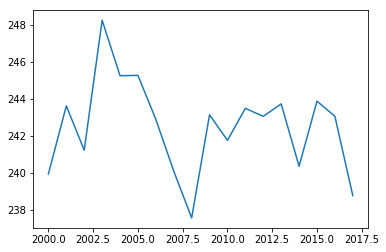

In [105]:
weight_year = df[['Year', 'Wt']].groupby(['Year']).mean()
weight_year
fig = plt.figure()
ax = fig.gca()
ax.plot(weight_year.index, weight_year['Wt'])
plt.show()

### Convert Height to inches

In [108]:
def convert_height(x):
    feet = x.split("-")[0]
    inches = x.split("-")[1]
    height = (int(feet) * 12) + int(inches)
    return height
df['Height'] = df['Height'].apply(convert_height)
df

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Unit,DraftTeam,DraftRd,DraftPick
0,1,2000,Bashir Yamini,WR,0.0,Iowa,College Stats,75,191,4.53,33.0,NaN,130.0,7.09,4.18,Offense,None,None,None
1,2,2000,Spergon Wynn,QB,2.0,Texas State,College Stats,75,229,4.91,34.0,NaN,108.0,7.71,4.59,Offense,Cleveland Browns,6,183
2,3,2000,James Williams,WR,4.0,Marshall,College Stats,71,180,4.59,36.0,NaN,123.0,7.22,4.16,Offense,Seattle Seahawks,6,175
3,4,2000,Bobbie Williams,OT,64.0,Arkansas,NaN,76,332,5.26,29.0,28.0,97.0,7.78,4.72,Offense,Philadelphia Eagles,2,61
4,5,2000,Michael Wiley,RB,4.0,Ohio State,College Stats,71,193,4.50,NaN,NaN,NaN,NaN,NaN,Offense,Dallas Cowboys,5,144
5,6,2000,Dez White,WR,19.0,Georgia Tech,College Stats,73,218,4.62,37.5,NaN,124.0,6.91,4.09,Offense,Chicago Bears,3,69
6,7,2000,Austin Wheatley,TE,0.0,Iowa,College Stats,76,254,4.66,32.5,NaN,121.0,6.97,4.18,Offense,New Orleans Saints,5,158
7,8,2000,James Whalen,TE,1.0,Kentucky,College Stats,74,228,4.78,31.0,NaN,110.0,7.42,4.22,Offense,Tampa Bay Buccaneers,5,157
8,9,2000,Peter Warrick,WR,29.0,Florida State,College Stats,71,194,4.58,NaN,NaN,NaN,NaN,NaN,Offense,Cincinnati Bengals,1,4
9,10,2000,Troy Walters,WR,13.0,Stanford,College Stats,66,171,4.55,32.5,NaN,106.0,6.61,3.84,Offense,Minnesota Vikings,5,165


In [116]:
df_nonan = df.dropna(axis=0)
df_nonan.describe()
# lose almost all the data points - too few players participate in all drills

,Rk,Year,AV,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,67.105224,2009.833582,17.299254,73.669403,244.197015,4.714343,33.655970,21.135075,115.646269,7.189910,4.339970
std,40.100063,4.613184,21.478144,2.662570,43.071904,0.274936,4.031745,6.507338,8.566235,0.371722,0.242107
min,1.000000,2000.000000,0.000000,65.000000,166.000000,4.260000,20.500000,2.000000,85.000000,6.480000,3.750000
25%,32.000000,2006.000000,2.000000,72.000000,208.000000,4.500000,31.000000,16.000000,111.000000,6.920000,4.170000
50%,65.000000,2010.000000,8.000000,74.000000,241.000000,4.650000,34.000000,21.000000,117.000000,7.110000,4.310000
75%,101.000000,2014.000000,25.000000,76.000000,271.000000,4.860000,36.500000,25.000000,121.000000,7.400000,4.482500
max,156.000000,2017.000000,157.000000,80.000000,370.000000,5.640000,45.000000,44.000000,139.000000,8.720000,5.210000


In [120]:
df.describe()

,Rk,Year,AV,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle
count,5636.000000,5636.000000,4089.000000,5636.000000,5636.000000,5553.000000,4413.000000,3828.000000,4374.000000,3686.000000,3742.000000
mean,78.977999,2008.529631,16.823918,73.763840,242.491306,4.770501,32.966010,20.840909,114.210791,7.270757,4.381168
std,45.539166,5.180094,23.971114,2.648355,44.600760,0.300133,4.163298,6.347158,9.146190,0.419310,0.268175
min,1.000000,2000.000000,-4.000000,65.000000,149.000000,4.220000,17.500000,2.000000,74.000000,6.340000,3.730000
25%,40.000000,2004.000000,1.000000,72.000000,206.000000,4.540000,30.000000,16.000000,109.000000,6.960000,4.190000
50%,79.000000,2009.000000,7.000000,74.000000,233.000000,4.690000,33.000000,21.000000,115.000000,7.180000,4.330000
75%,118.000000,2013.000000,23.000000,76.000000,273.000000,4.950000,36.000000,25.000000,121.000000,7.510000,4.540000
max,172.000000,2017.000000,255.000000,82.000000,375.000000,6.050000,46.000000,49.000000,147.000000,9.120000,5.560000


In [157]:
df2 = df[['Year', 'Pos', 'Height', 'Wt', '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle','Unit', 'DraftRd']]
df2['DraftRd'] = df2['DraftRd'].fillna(0)
df2['BenchReps'] = df2['BenchReps'].fillna(-1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
df2 = df2.fillna('-1')
df2 = df2.apply(pd.to_numeric, errors='ignore')
df2

,Year,Pos,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Unit,DraftRd
0,2000,WR,75,191,4.53,33.0,-1.0,130.0,7.09,4.18,Offense,0
1,2000,QB,75,229,4.91,34.0,-1.0,108.0,7.71,4.59,Offense,6
2,2000,WR,71,180,4.59,36.0,-1.0,123.0,7.22,4.16,Offense,6
3,2000,OT,76,332,5.26,29.0,28.0,97.0,7.78,4.72,Offense,2
4,2000,RB,71,193,4.50,-1.0,-1.0,-1.0,-1.00,-1.00,Offense,5
5,2000,WR,73,218,4.62,37.5,-1.0,124.0,6.91,4.09,Offense,3
6,2000,TE,76,254,4.66,32.5,-1.0,121.0,6.97,4.18,Offense,5
7,2000,TE,74,228,4.78,31.0,-1.0,110.0,7.42,4.22,Offense,5
8,2000,WR,71,194,4.58,-1.0,-1.0,-1.0,-1.00,-1.00,Offense,1
9,2000,WR,66,171,4.55,32.5,-1.0,106.0,6.61,3.84,Offense,5


### Play around with some visualizations of the data
Create some various slices of visualizations to see if there are any meaningful relationships to uncover

['WR' 'QB' 'OT' 'RB' 'TE' 'OG' 'FB' 'DE' 'DT' 'OLB' 'CB' 'ILB' 'FS' 'SS'
 'P' 'LS']


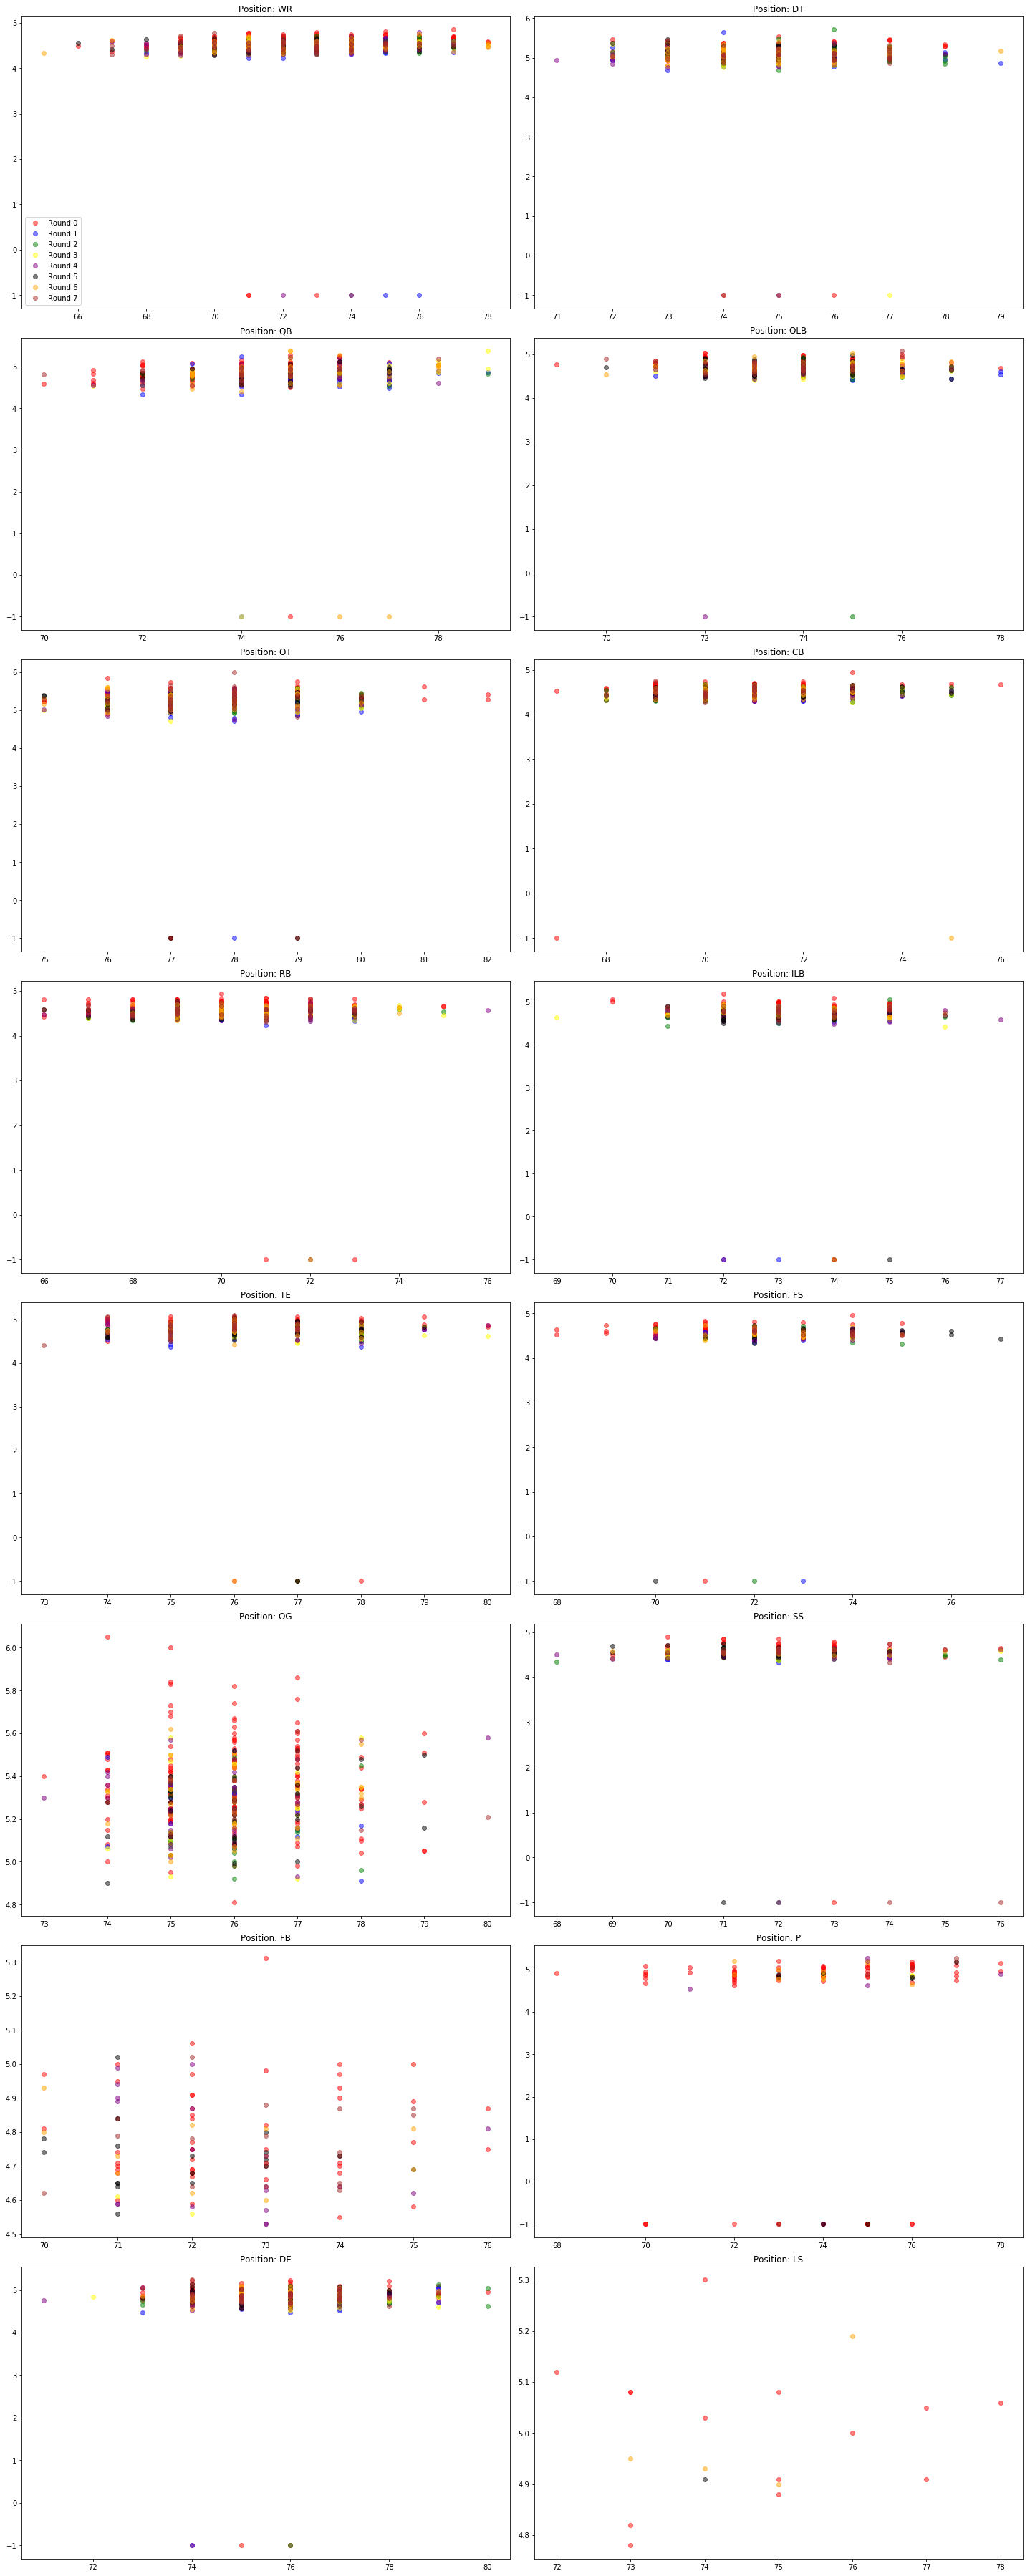

In [154]:
plot_data = df2
print(plot_data.Pos.unique())
# plot40
fig, axes = plt.subplots(8, 2, figsize=(20, 50))
cols = 0
rows = 0
for pos in plot_data.Pos.unique():
#     print("Pos: {}; grid: ({}, {})".format(pos, rows, cols))
    
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'black', 'orange', 'brown']
    for i in range(0, 8):
        axes[rows, cols].plot(plot_data[(plot_data['Pos'] == pos) & (plot_data['DraftRd'] == i)]['Height'], plot_data[(plot_data['Pos'] == pos)  & (plot_data['DraftRd'] == i)]['40YD'], 'o', color=colors[i], label="Round " + str(i), alpha=0.5)
        axes[rows, cols].set_title("Position: " + pos)
    axes[0, 0].legend()
    
    rows = rows + 1
    if cols == 1:
        if rows > 7:
            break
    if rows > 7:
        cols = cols + 1
        rows = 0
        continue
plt.tight_layout(pad=0.8)
plt.show()

In [177]:
rank_40 = []
rank_vert = []
rank_bench = []
rank_broad = []
rank_3cone = []
rank_shuttle = []
for index, row in df2.iterrows():
    year = row['Year']
    position = row['Pos']
#     print("{}: {}".format(year, position))
    #Calculate 40YD quartile
#     print("-------40YD-------")
    quartile_1 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['40YD'] != -1)]["40YD"].quantile(.25)
    median = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['40YD'] != -1)]["40YD"].quantile(.5)
    quartile_3 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['40YD'] != -1)]["40YD"].quantile(.75)
#     print("1: {}\n2: {}\n3: {}".format(quartile_1, median, quartile_3))
#     print(row['40YD'])
    quartile = 4
    if row['40YD'] == -1:
        quartile = -1
    elif row['40YD'] <= quartile_1:
        quartile = 1
    elif row['40YD'] <= median:
        quartile = 2
    elif row['40YD'] <= quartile_3:
        quartile = 3
#     print("Quartile: {}".format(quartile))
    rank_40.append(quartile)
    
    #Calculate vert quartile
#     print("-------Vertical-------")
    quartile_1 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['Vertical'] != -1)]["Vertical"].quantile(.25)
    median = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['Vertical'] != -1)]["Vertical"].quantile(.5)
    quartile_3 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['Vertical'] != -1)]["Vertical"].quantile(.75)
#     print("3: {}\n2: {}\n1: {}".format(quartile_1, median, quartile_3))
#     print(row['Vertical'])
    quartile = 4
    if row['Vertical'] == -1:
        quartile = -1
    elif row['Vertical'] >= quartile_3:
        quartile = 1
    elif row['Vertical'] >= median:
        quartile = 2
    elif row['Vertical'] >= quartile_1:
        quartile = 3
#     print("Quartile: {}".format(quartile))
    rank_vert.append(quartile)
    
    #Calculate BenchReps quartile
#     print("-------Bench-------")
    quartile_1 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['BenchReps'] != -1)]["BenchReps"].quantile(.25)
    median = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['BenchReps'] != -1)]["BenchReps"].quantile(.5)
    quartile_3 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['BenchReps'] != -1)]["BenchReps"].quantile(.75)
#     print("3: {}\n2: {}\n1: {}".format(quartile_1, median, quartile_3))
#     print(row['BenchReps'])
    quartile = 4
    if row['BenchReps'] == -1:
        quartile = -1
    elif row['BenchReps'] >= quartile_3:
        quartile = 1
    elif row['BenchReps'] >= median:
        quartile = 2
    elif row['BenchReps'] >= quartile_1:
        quartile = 3
#     print("Quartile: {}".format(quartile))
    rank_bench.append(quartile)
    
    #Calculate Broad Jump quartile
#     print("-------Broad Jump-------")
    quartile_1 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['Broad Jump'] != -1)]["Broad Jump"].quantile(.25)
    median = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['Broad Jump'] != -1)]["Broad Jump"].quantile(.5)
    quartile_3 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['Broad Jump'] != -1)]["Broad Jump"].quantile(.75)
#     print("3: {}\n2: {}\n1: {}".format(quartile_1, median, quartile_3))
#     print(row['Broad Jump'])
    quartile = 4
    if row['Broad Jump'] == -1:
        quartile = -1
    elif row['Broad Jump'] >= quartile_3:
        quartile = 1
    elif row['Broad Jump'] >= median:
        quartile = 2
    elif row['Broad Jump'] >= quartile_1:
        quartile = 3
#     print("Broad Jump: {}".format(quartile))
    rank_broad.append(quartile)
    
    #Calculate 3Cone quartile
    print("-------3Cone-------")
    quartile_1 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['3Cone'] != -1)]["3Cone"].quantile(.25)
    median = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['3Cone'] != -1)]["3Cone"].quantile(.5)
    quartile_3 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['3Cone'] != -1)]["3Cone"].quantile(.75)
#     print("1: {}\n2: {}\n3: {}".format(quartile_1, median, quartile_3))
#     print(row['3Cone'])
    quartile = 4
    if row['3Cone'] == -1:
        quartile = -1
    elif row['3Cone'] <= quartile_1:
        quartile = 1
    elif row['3Cone'] <= median:
        quartile = 2
    elif row['3Cone'] <= quartile_3:
        quartile = 3
#     print("Quartile: {}".format(quartile))
    rank_3cone.append(quartile)
    
    #Calculate Shuttle quartile
#     print("-------Shuttle-------")
    quartile_1 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['Shuttle'] != -1)]["Shuttle"].quantile(.25)
    median = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['Shuttle'] != -1)]["Shuttle"].quantile(.5)
    quartile_3 = df2[(df2['Year'] == year) & (df2['Pos'] == position) & (df2['Shuttle'] != -1)]["Shuttle"].quantile(.75)
#     print("1: {}\n2: {}\n3: {}".format(quartile_1, median, quartile_3))
#     print(row['Shuttle'])
    quartile = 4
    if row['Shuttle'] == -1:
        quartile = -1
    elif row['Shuttle'] <= quartile_1:
        quartile = 1
    elif row['Shuttle'] <= median:
        quartile = 2
    elif row['Shuttle'] <= quartile_3:
        quartile = 3
#     print("Quartile: {}".format(quartile))
    rank_shuttle.append(quartile)
df2['40_quartile_yr_pos'] = rank_40 
df2['vert_quartile_yr_pos'] = rank_vert
df2['bench_quartile_yr_pos'] = rank_bench
df2['broad_quartile_yr_pos'] = rank_broad
df2['3cone_quartile_yr_pos'] = rank_3cone
df2['shuttle_quartile_yr_pos'] = rank_shuttle
df2

-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------
-------3Cone-------


,Year,Pos,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Unit,DraftRd,40_quartile_yr_pos,vert_quartile_yr_pos,bench_quartile_yr_pos,broad_quartile_yr_pos,3cone_quartile_yr_pos,shuttle_quartile_yr_pos
0,2000,WR,75,191,4.53,33.0,-1.0,130.0,7.09,4.18,Offense,0,2,3,-1,1,3,3
1,2000,QB,75,229,4.91,34.0,-1.0,108.0,7.71,4.59,Offense,6,2,1,-1,2,4,4
2,2000,WR,71,180,4.59,36.0,-1.0,123.0,7.22,4.16,Offense,6,3,2,-1,1,4,2
3,2000,OT,76,332,5.26,29.0,28.0,97.0,7.78,4.72,Offense,2,2,1,1,3,2,1
4,2000,RB,71,193,4.50,-1.0,-1.0,-1.0,-1.00,-1.00,Offense,5,1,-1,-1,-1,-1,-1
5,2000,WR,73,218,4.62,37.5,-1.0,124.0,6.91,4.09,Offense,3,4,1,-1,1,1,1
6,2000,TE,76,254,4.66,32.5,-1.0,121.0,6.97,4.18,Offense,5,1,2,-1,1,2,2
7,2000,TE,74,228,4.78,31.0,-1.0,110.0,7.42,4.22,Offense,5,2,3,-1,3,4,2
8,2000,WR,71,194,4.58,-1.0,-1.0,-1.0,-1.00,-1.00,Offense,1,3,-1,-1,-1,-1,-1
9,2000,WR,66,171,4.55,32.5,-1.0,106.0,6.61,3.84,Offense,5,2,4,-1,4,1,1
